In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop



import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



./analysis.ipynb
./cnn_mnist_datagen.csv
./sample_submission.csv
./submission.csv
./test.csv
./train.csv
./.ipynb_checkpoints\analysis-checkpoint.ipynb
./.ipynb_checkpoints\cnn_mnist_datagen-checkpoint.csv
./.ipynb_checkpoints\README.md
./.ipynb_checkpoints\sample_submission-checkpoint.csv
./.ipynb_checkpoints\submission-checkpoint.csv
./.ipynb_checkpoints\.git\COMMIT_EDITMSG
./.ipynb_checkpoints\.git\config
./.ipynb_checkpoints\.git\description
./.ipynb_checkpoints\.git\HEAD
./.ipynb_checkpoints\.git\index
./.ipynb_checkpoints\.git\hooks\applypatch-msg.sample
./.ipynb_checkpoints\.git\hooks\commit-msg.sample
./.ipynb_checkpoints\.git\hooks\fsmonitor-watchman.sample
./.ipynb_checkpoints\.git\hooks\post-update.sample
./.ipynb_checkpoints\.git\hooks\pre-applypatch.sample
./.ipynb_checkpoints\.git\hooks\pre-commit.sample
./.ipynb_checkpoints\.git\hooks\pre-merge-commit.sample
./.ipynb_checkpoints\.git\hooks\pre-push.sample
./.ipynb_checkpoints\.git\hooks\pre-rebase.sample
./.ipynb_checkpo

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#归一化
scaler1 = StandardScaler()
test = scaler1.fit_transform(test)
# Convert pandas DataFrame to numpy array and reshape

#test = test.to_numpy().reshape(-1, 28, 28, 1)

# Directly reshape if test is already a numpy array

test = test.reshape(-1, 28, 28, 1)
test.shape

(28000, 28, 28, 1)

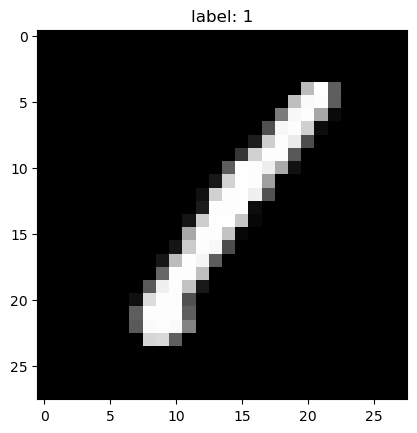

In [4]:
# 去掉第一列的label
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test
img0 = np.array(X_train)[0]
img0.reshape(28,28)
img0 = img0.reshape(28,28,order="c")
plt.title(f"label: {train.iloc[0, 0]}")
plt.imshow(img0,cmap='gray')
plt.show()

In [5]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

y_train = to_categorical(y_train, num_classes = 10)

# Check for NaN values in a NumPy array

print(f"Number of NaN values in X_train: {np.isnan(X_train).sum()}")

print(f"Number of NaN values in y_train: {np.isnan(y_train).sum()}")

# Replace NaN values with the mean of the array

X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))

Number of NaN values in X_train: 0
Number of NaN values in y_train: 0


In [6]:

#数据预处理：标准归一化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#划分数据集和测试机
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [7]:
# Reshape the data to (num_samples, height, width, channels)

X_train = X_train.reshape(-1, 28, 28, 1)

# If you also have a validation or test set, reshape them too

X_val = X_val.reshape(-1, 28, 28, 1)

In [8]:
# Set the CNN model



model = Sequential()



model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',

                 activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',

                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))





model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',

                 activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',

                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))





model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

C:\Users\Besta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf



optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
# Compile the model

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',

                                            patience=3,

                                            verbose=1,

                                            factor=0.5,

                                            min_lr=1e-6)

In [12]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy

batch_size = 86

In [13]:
datagen = ImageDataGenerator(

        featurewise_center=False,  # set input mean to 0 over the dataset

        samplewise_center=False,  # set each sample mean to 0

        featurewise_std_normalization=False,  # divide inputs by std of the dataset

        samplewise_std_normalization=False,  # divide each input by its std

        zca_whitening=False,  # apply ZCA whitening

        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)

        zoom_range = 0.1, # Randomly zoom image

        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)

        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)

        horizontal_flip=False,  # randomly flip images

        vertical_flip=False)  # randomly flip images





datagen.fit(X_train)

In [14]:
# Fit the model using fit (not fit_generator)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),

                    epochs=10,

                    validation_data=(X_val, y_val),

                    verbose=2,

                    steps_per_epoch=X_train.shape[0] // batch_size,

                    callbacks=[learning_rate_reduction])



# Get the final accuracy from the training history

train_accuracy = history.history['accuracy'][-1]

val_accuracy = history.history['val_accuracy'][-1]



print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")

print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/10


C:\Users\Besta\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 - 7s - 16ms/step - accuracy: 0.7914 - loss: 0.6580 - val_accuracy: 0.9674 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Besta\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


439/439 - 5s - 11ms/step - accuracy: 0.9259 - loss: 0.2504 - val_accuracy: 0.9750 - val_loss: 0.0833 - learning_rate: 0.0010
Epoch 3/10


C:\Users\Besta\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


439/439 - 4s - 8ms/step - accuracy: 0.9472 - loss: 0.1754 - val_accuracy: 0.9814 - val_loss: 0.0637 - learning_rate: 0.0010
Epoch 4/10
439/439 - 5s - 11ms/step - accuracy: 0.9541 - loss: 0.1529 - val_accuracy: 0.9781 - val_loss: 0.0773 - learning_rate: 0.0010
Epoch 5/10
439/439 - 5s - 11ms/step - accuracy: 0.9610 - loss: 0.1313 - val_accuracy: 0.9836 - val_loss: 0.0546 - learning_rate: 0.0010
Epoch 6/10
439/439 - 4s - 8ms/step - accuracy: 0.9641 - loss: 0.1234 - val_accuracy: 0.9893 - val_loss: 0.0417 - learning_rate: 0.0010
Epoch 7/10
439/439 - 5s - 11ms/step - accuracy: 0.9663 - loss: 0.1206 - val_accuracy: 0.9883 - val_loss: 0.0498 - learning_rate: 0.0010
Epoch 8/10
439/439 - 5s - 11ms/step - accuracy: 0.9695 - loss: 0.1021 - val_accuracy: 0.9895 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 9/10
439/439 - 4s - 8ms/step - accuracy: 0.9683 - loss: 0.1053 - val_accuracy: 0.9876 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 10/10
439/439 - 5s - 11ms/step - accuracy: 0.9710 - loss

In [15]:
test.shape

(28000, 28, 28, 1)

In [16]:
# predict results

results = model.predict(test)



# select the indix with the maximum probability

results = np.argmax(results,axis = 1)



results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,662,592 (10.16 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,775,062 (6.77 MB)

In [18]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)



submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [19]:
from sklearn.metrics import classification_report





# Ensure the test data is in the correct shape (e.g., 28x28x1 for grayscale images)

test = test.reshape(-1, 28, 28, 1)



# Predict the results using the trained model

results = model.predict(test)



# Select the index with the maximum probability for each prediction

results = np.argmax(results, axis=1)



# Convert the predictions into a pandas Series

results = pd.Series(results, name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [20]:

output = pd.DataFrame({"ImageId": range(1, len(results) + 1), "Label": results})

output.to_csv("submission.csv", index=False)

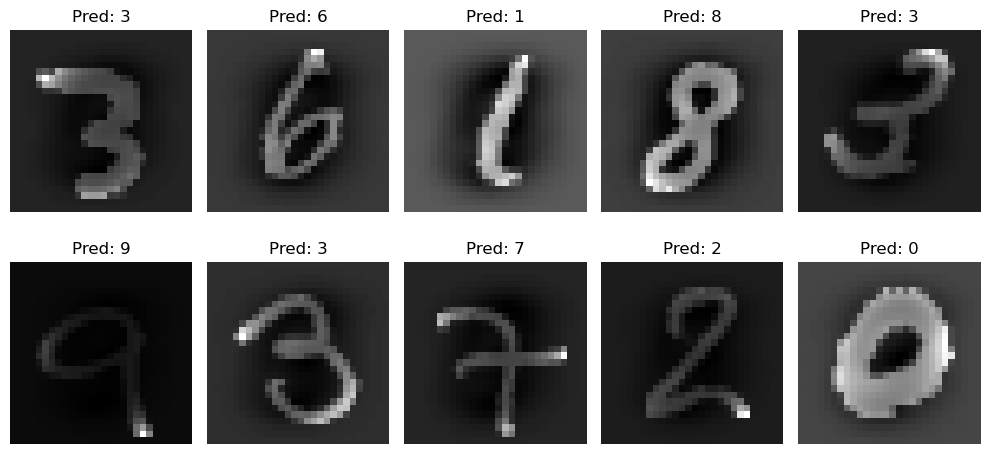

In [21]:


# Choose a number of images to visualize (e.g., 10 random images)

num_images = 10



# Select random indices for images

indices = np.random.choice(len(test), num_images, replace=False)



# Create a plot with 1 row and num_images columns

plt.figure(figsize=(10, 5))



for i, idx in enumerate(indices):

    plt.subplot(2, 5, i + 1)  # Arrange images in 2 rows and 5 columns

    plt.imshow(test[idx].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for visualization

    plt.title(f"Pred: {results[idx]}")

    plt.axis('off')  # Hide axis labels



plt.tight_layout()

plt.show()

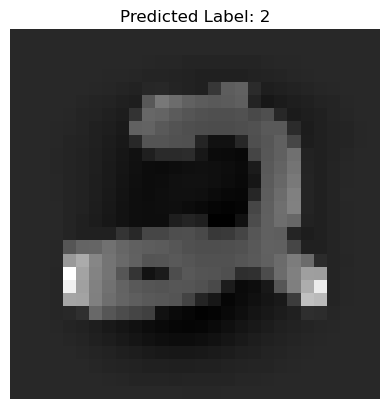

In [22]:
import matplotlib.pyplot as plt

import numpy as np



# Choose the index of the image you want to visualize from the test set

index = 0  # Change this to the specific index of the test image you want to test



# Reshape the image to 28x28 and display it (since it was reshaped to (28, 28, 1))

plt.imshow(test[index].reshape(28, 28), cmap='gray')

plt.title(f"Predicted Label: {results[index]}")

plt.axis('off')  # Hide axis labels

plt.show()

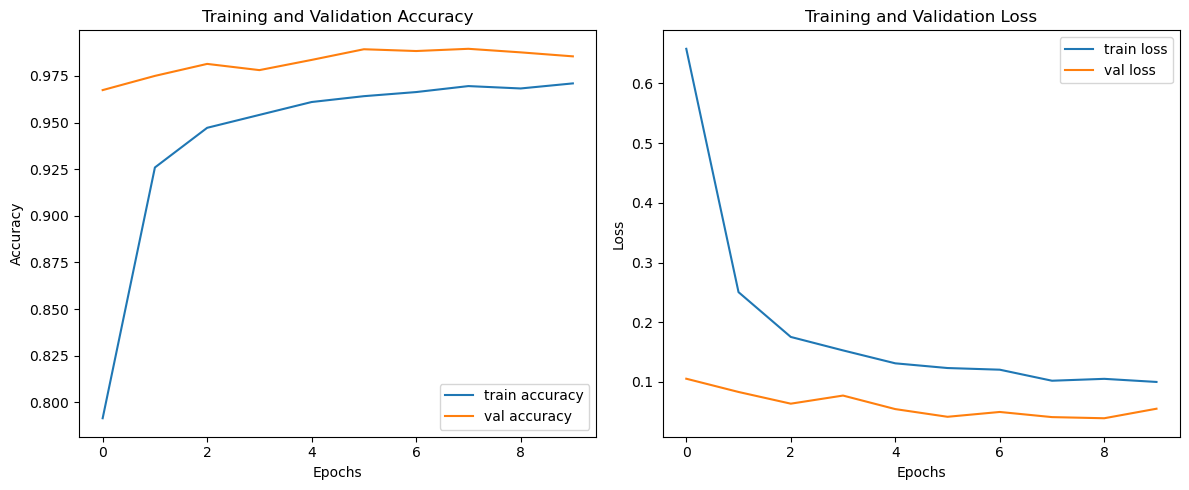

In [23]:
# Visualizing the training history (accuracy and loss)

plt.figure(figsize=(12, 5))



# Plot training & validation accuracy

plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()



# Plot training & validation loss

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'], label='train loss')

plt.plot(history.history['val_loss'], label='val loss')

plt.title('Training and Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()



plt.tight_layout()

plt.show()